In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2018-119914,2018-05-04,2018-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df=df.drop(['Row ID'], axis=1)

In [9]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
#number of duplicated rows.
df.duplicated().sum()

1

# DATA PREPROCESSING

In [11]:
# separate columns without object in num_e and columns with int and float in num

num_e=df.select_dtypes(exclude='object').columns
num=df.select_dtypes(include=["int64","float64"])

In [12]:
num_e

Index(['Order Date', 'Ship Date', 'Postal Code', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [13]:
num

,Postal Code,Sales,Quantity,Discount,Profit
0,42420.0,261.9600,2,0.00,41.9136
1,42420.0,731.9400,3,0.00,219.5820
2,90036.0,14.6200,2,0.00,6.8714
3,33311.0,957.5775,5,0.45,-383.0310
4,33311.0,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,33180.0,25.2480,3,0.20,4.1028
9990,92627.0,91.9600,2,0.00,15.6332
9991,92627.0,258.5760,2,0.20,19.3932
9992,92627.0,29.6000,4,0.00,13.3200


In [14]:
#seperate categorical columns in cat

cat=df.select_dtypes(include=["object"])
cat

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,CA-2017-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,CA-2017-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,US-2016-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2015-110422,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle
9990,CA-2018-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...
9991,CA-2018-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone
9992,CA-2018-121258,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5"""


In [15]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9983.0,55245.233297,32038.715955,1040.000,23223.00000,57103.0000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [16]:
contins=['Sales', 'Profit', 'Discount']
contins

['Sales', 'Profit', 'Discount']

<AxesSubplot:>

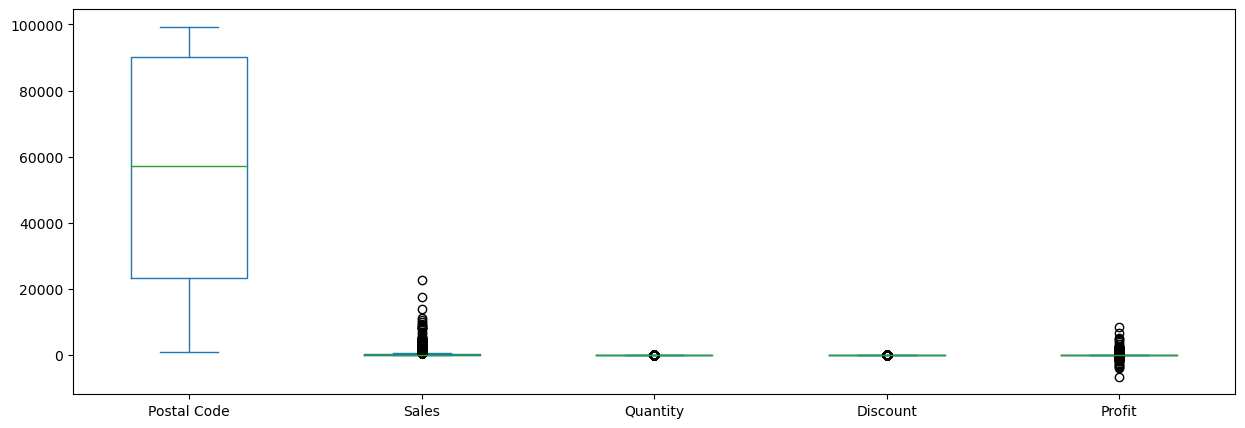

In [17]:
#detecting outliers
num.plot(kind="box",figsize=(15,5))

In [18]:
#describe categorical columns and transpose the dataframe by using T

cat.describe().T

,count,unique,top,freq
Order ID,9994,5009,CA-2018-100111,14
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,912
State,9994,49,California,2001
Region,9994,4,West,3203
Product ID,9994,1862,OFF-PA-10001970,19


### Handling missing values

In [19]:
df['Postal Code']=df['Postal Code'].fillna(df['Postal Code'].mode()[0])

In [20]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Removing duplicates

In [21]:
df.drop_duplicates(keep=False, inplace=True)

In [22]:
df.duplicated().sum()

0

### Handling outliers

In [23]:
def out(x):
    q1=np.percentile(df[x], 25, interpolation='midpoint')
    q2=np.percentile(df[x], 50, interpolation='midpoint')
    q3=np.percentile(df[x], 75, interpolation='midpoint')
    IQR=q3-q1
    upperlimit=q3+1.5*IQR
    lowerlimit=q1-1.5*IQR
    print("uplim= ",upperlimit,"\n lower lim= ",lowerlimit)
    df[x]=np.where(df[x]>upperlimit,upperlimit,df[x])
    return upperlimit,lowerlimit

In [24]:
out('Profit')

uplim=  70.812375 
 lower lim=  -39.716625


(70.812375, -39.716625)

In [25]:
df['Profit']=np.where(df['Profit']<-39.72, -39.72,df['Profit'])

In [26]:
out('Sales')

uplim=  498.94149999999996 
 lower lim=  -271.74249999999995


(498.94149999999996, -271.74249999999995)

In [27]:
out('Discount')

uplim=  0.5 
 lower lim=  -0.30000000000000004


(0.5, -0.30000000000000004)

In [28]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.913600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.9415,3,0.00,70.812375
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.871400
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,498.9415,5,0.45,-39.720000
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.516400


contins=['Sales', 'Profit', 'Discount']

for column in contins:
    plt.figure(figsize=(15,10))
    sns.boxplot(data=df, x=column)

## DATA VISUALIZATION

### Univariate Analysis

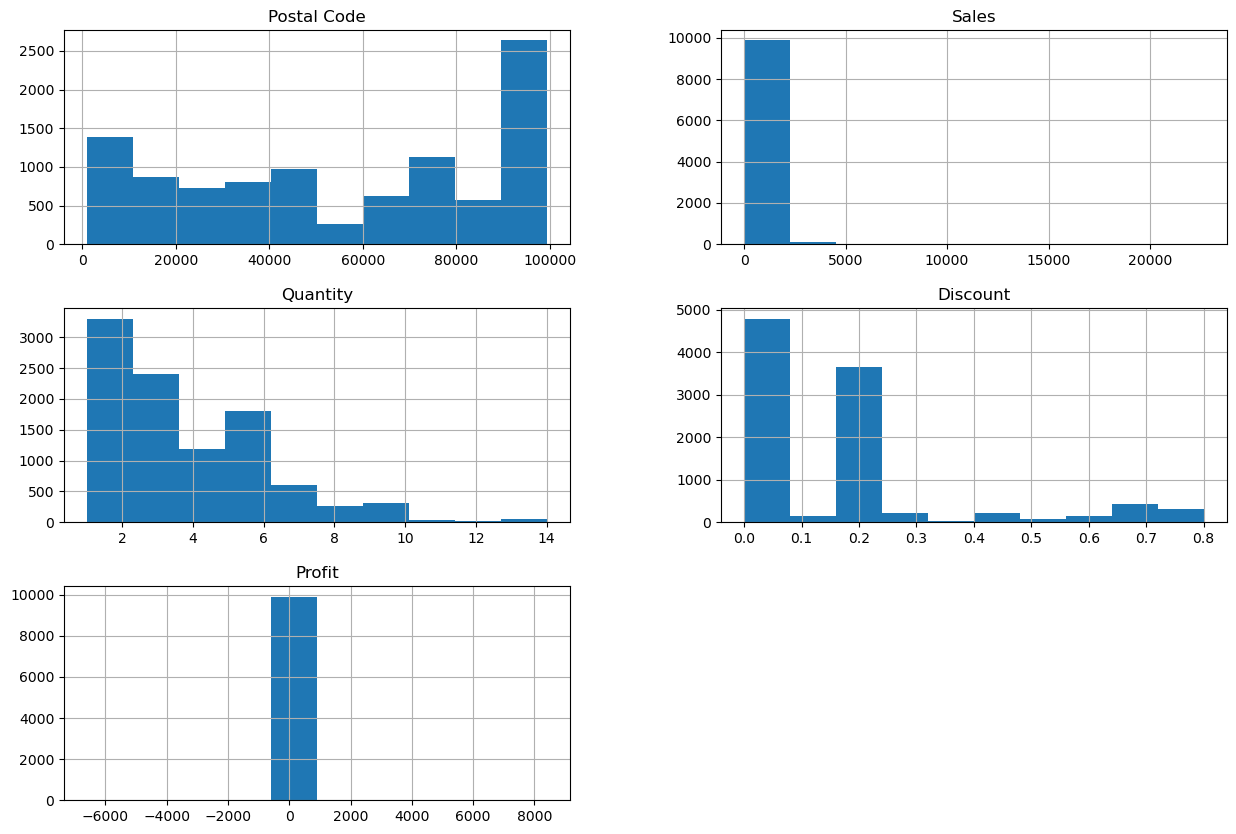

In [29]:
#Histogram of numerical values
# x-axis -> range of values for the numerical variable, y -> count of observations falling within each bin.
num.hist(figsize=(15,10))
plt.show()

<AxesSubplot:>

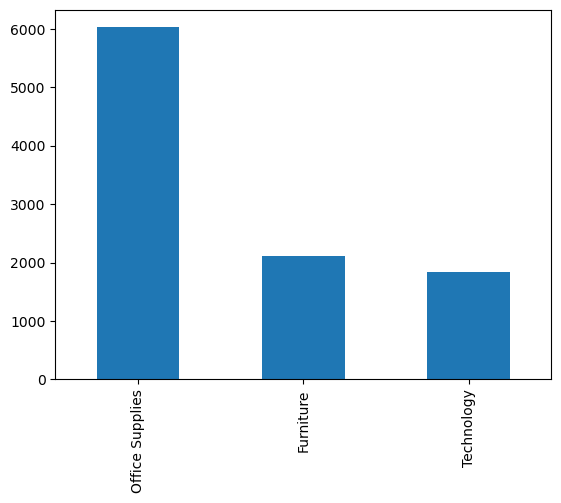

In [30]:
#count number of each category in Category column

df.Category.value_counts().plot(kind='bar')

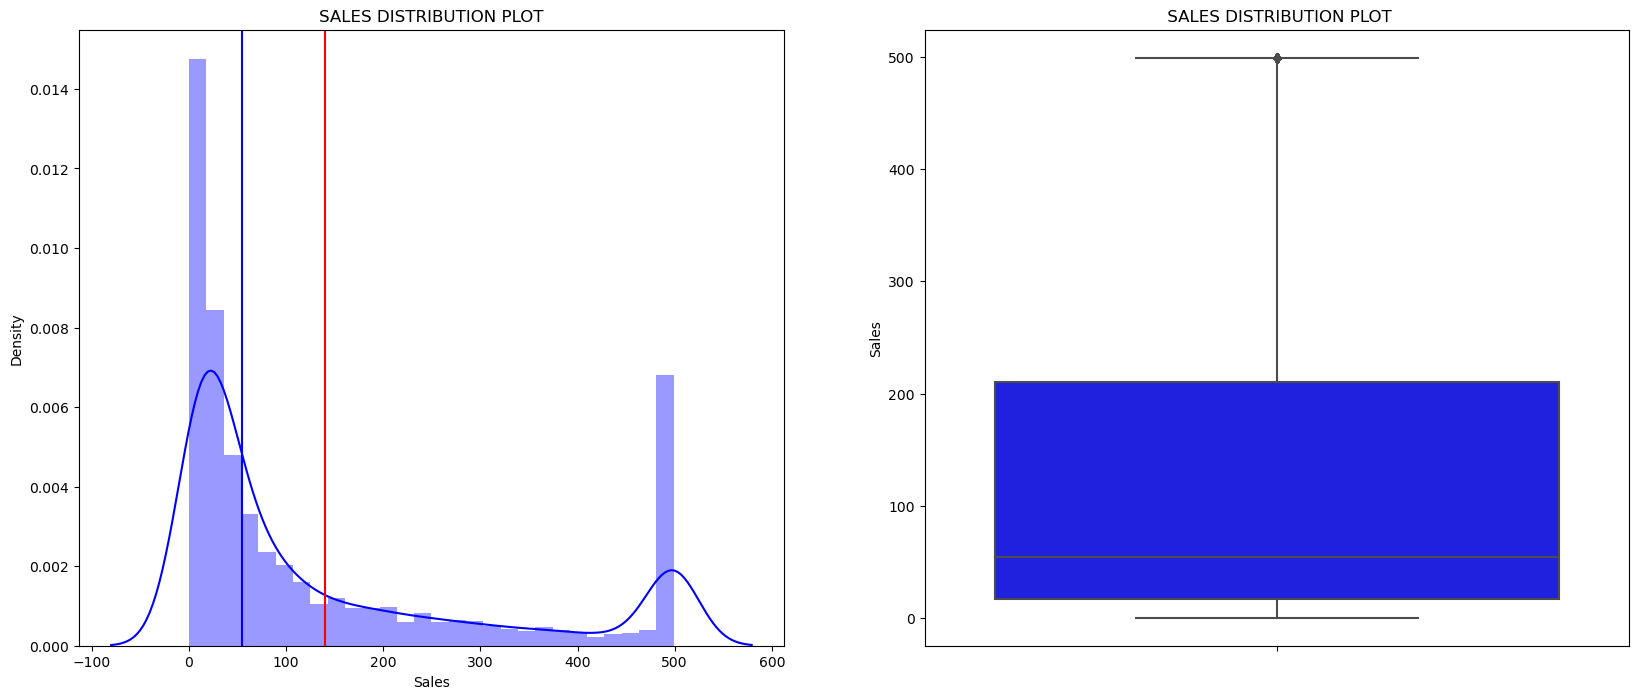

In [31]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('SALES DISTRIBUTION PLOT')
sns.distplot(df.Sales, color='b')
plt.axvline(df.Sales.mean(), color="r")
plt.axvline(df.Sales.median(), color="b")

plt.subplot(1,2,2)
plt.title(' SALES DISTRIBUTION PLOT')
sns.boxplot(y=df.Sales, color='b')

plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Category', ylabel='Sales'>

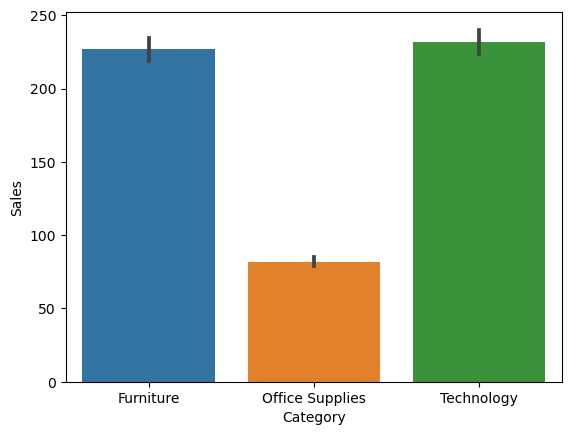

In [32]:
sns.barplot(x='Category',y='Sales',data=df)

## Multivariate Analysis

<AxesSubplot:>

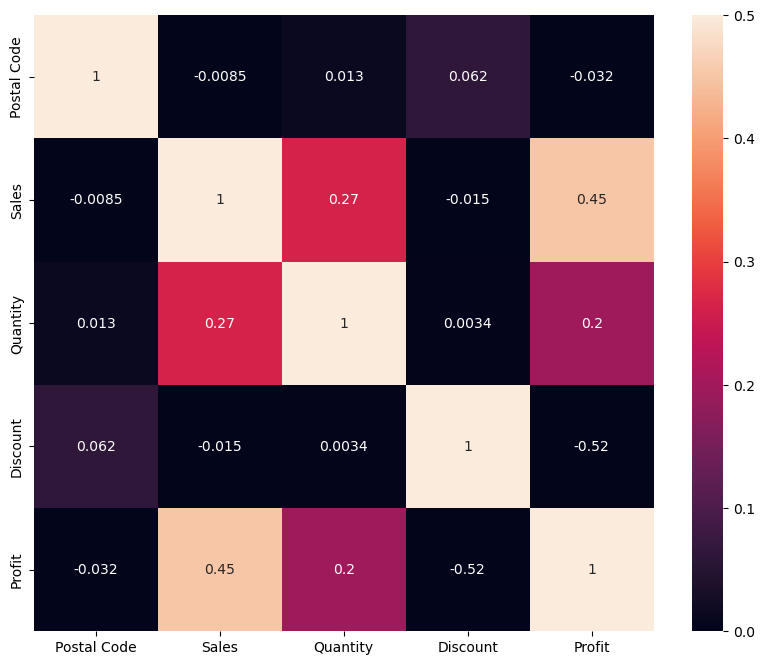

In [33]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cor,vmin=0,vmax=0.5, annot=True, ax=ax) 
#cmap = 'jet')

# Heatmap says that sales column has the highest correlation with profit

In [34]:
#Checking for the different types of categories included
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [35]:
#Now we create a dataframe showing the details of the sales of one product,,here we are going to show the data of furniture sales.
furniture=df.loc[df['Category']=='Furniture']
furniture

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.913600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.9415,3,0.00,70.812375
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,498.9415,5,0.45,-39.720000
5,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.169400
10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,498.9415,9,0.20,70.812375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,CA-2016-168088,2016-03-19,2016-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,Texas,77041.0,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-39.720000
9964,CA-2017-146374,2017-12-05,2017-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711.0,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.432000
9980,US-2016-151435,2016-09-06,2016-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506.0,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.354800
9989,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.102800


In [36]:
#To know the first  date of order for the furniture category
furniture['Order Date'].min()

Timestamp('2015-01-06 00:00:00')

In [37]:
#To know the last date of order for the furniture category
furniture['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [38]:
furniture.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [39]:
#make copy of furniture data on which we can perform further operation 
f1=furniture.copy()

In [40]:
cols=['Order ID', 'Ship Date','Country', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
        'Quantity', 'Discount', 'Profit']

In [41]:
f1=f1.drop(f1[cols],axis=1)

In [42]:
f1

,Order Date,Sales
0,2017-11-08,261.9600
1,2017-11-08,498.9415
3,2016-10-11,498.9415
5,2015-06-09,48.8600
10,2015-06-09,498.9415
...,...,...
9962,2016-03-19,383.4656
9964,2017-12-05,13.4000
9980,2016-09-06,85.9800
9989,2015-01-21,25.2480


In [43]:
#sorting the dataframe according to the order dates
f1=f1.sort_values('Order Date')
f1

,Order Date,Sales
7474,2015-01-06,498.9415
7660,2015-01-07,76.7280
866,2015-01-10,51.9400
716,2015-01-11,9.9400
2978,2015-01-13,498.9415
...,...,...
1877,2018-12-29,393.5680
7632,2018-12-29,498.9415
5457,2018-12-29,68.4600
5131,2018-12-29,101.1200


# Indexing the Dataset

In [44]:
#To find the total sales of furniture occured on each dates
f1=f1.groupby('Order Date')['Sales'].sum().reset_index()

In [45]:
#set order date as the index column
f1.set_index('Order Date',inplace=True)
f1.size

889

In [46]:
f1.head()

,Sales
Order Date,
2015-01-06,498.9415
2015-01-07,76.7280
2015-01-10,51.9400
2015-01-11,9.9400
2015-01-13,832.9405


# Stationarity check

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
#Augmented Dickey-Fuller (ADF) test 
#HO: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    # if p-value <= 0.05
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root,indicating it is non stationary")
        

In [49]:
adfuller_test(f1['Sales'])

strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


# Resampling the data into means of monthly sale of furniture and save it into a new variable

In [50]:

# resample the time series data. 'MS' specifies that we want to resample the data to the start of each month ('M')
# and calculate the mean value ('S' stands for 'start').
# This effectively aggregates the data into monthly intervals.

y_furniture=f1['Sales'].resample('MS').mean()
y_furniture

Order Date
2015-01-01    273.203808
2015-02-01    216.475900
2015-03-01    558.727882
2015-04-01    372.471893
2015-05-01    347.256062
2015-06-01    390.780084
2015-07-01    446.752556
2015-08-01    342.913250
2015-09-01    570.077429
2015-10-01    493.239906
2015-11-01    665.831532
2015-12-01    824.636325
2016-01-01    355.303500
2016-02-01    394.082583
2016-03-01    445.452444
2016-04-01    599.310308
2016-05-01    369.858967
2016-06-01    305.611528
2016-07-01    521.917605
2016-08-01    444.676137
2016-09-01    691.153368
2016-10-01    455.741526
2016-11-01    784.638429
2016-12-01    650.570432
2017-01-01    321.346067
2017-02-01    313.437864
2017-03-01    476.282167
2017-04-01    443.314658
2017-05-01    370.658000
2017-06-01    582.276938
2017-07-01    547.818441
2017-08-01    451.503959
2017-09-01    798.880667
2017-10-01    487.235447
2017-11-01    749.351020
2017-12-01    865.754346
2018-01-01    317.811700
2018-02-01    423.596569
2018-03-01    365.009790
2018-04-01    

## Plotting sales data of furniture category

<AxesSubplot:xlabel='Order Date'>

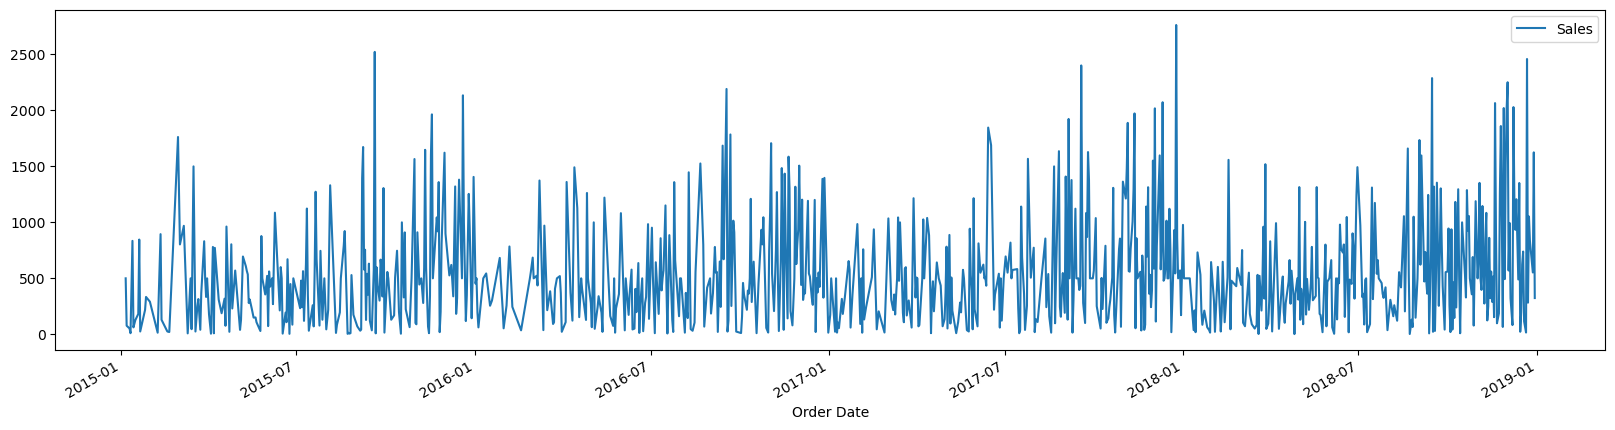

In [51]:
f1.plot(figsize=(20,5))

## Plotting mean sale data of furniture category

Text(0, 0.5, 'Sales')

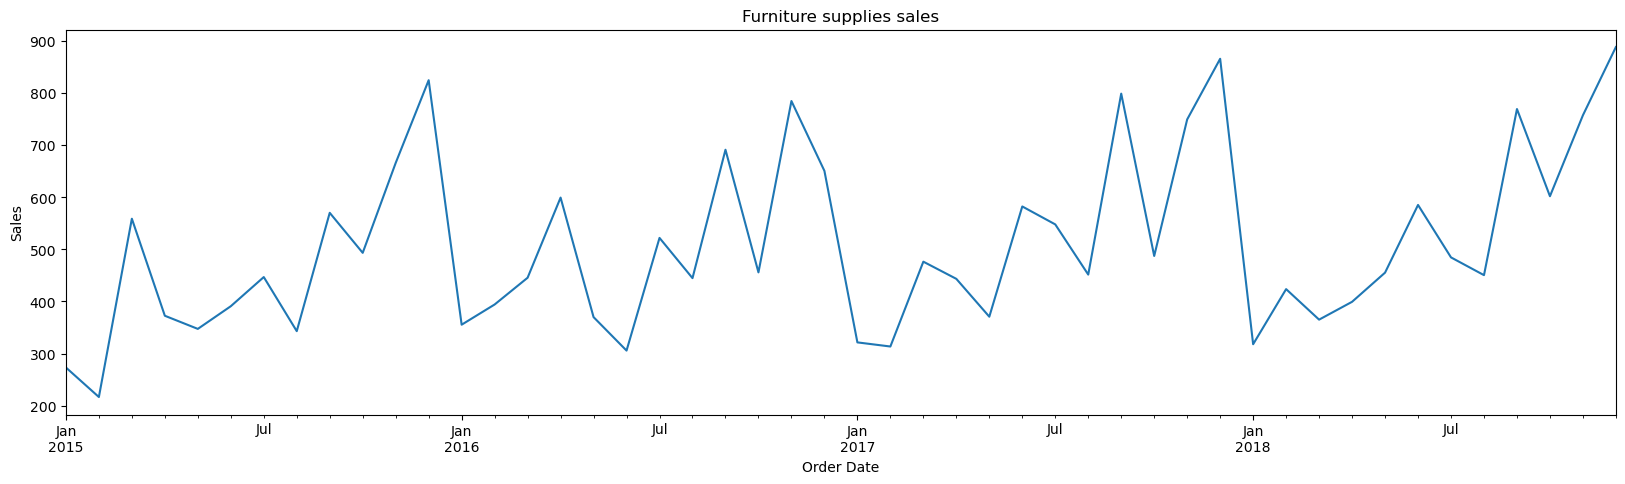

In [52]:
y_furniture.plot(figsize=(20,5))
plt.title("Furniture supplies sales")
plt.ylabel("Sales")

 The time-series has seasonality pattern, such as sales are always low at 
the beginning of the year and high at the end of the year. There is always an upward trend within any 
single year with a couple of low months in the mid of the year. We can also visualize our data
using a method called time-series decomposition that allows us to decompose 
    our time series into three distinct components: trend, seasonality, and noise

# ETS DECOMPOSITION FOR FURNITURE

In [53]:
import statsmodels.api as sm

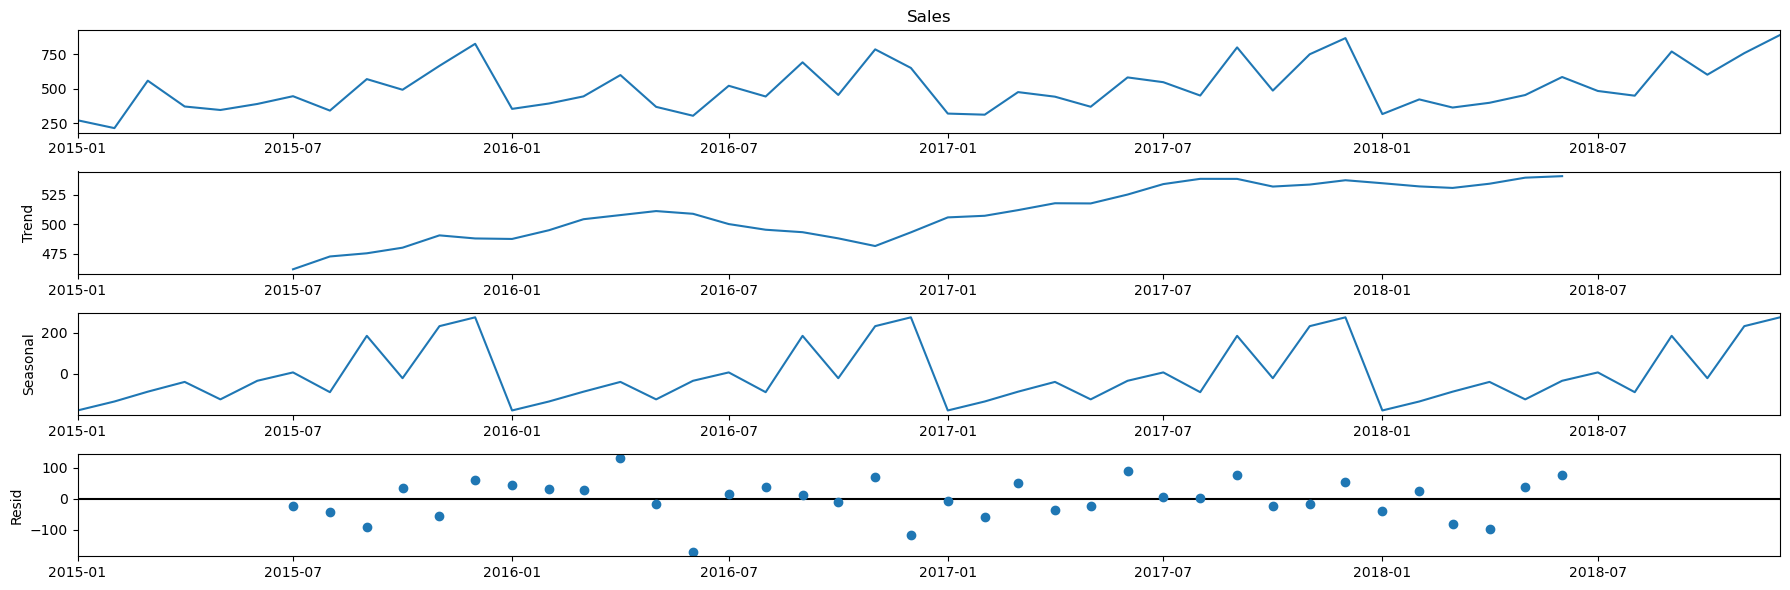

In [54]:
from pylab import rcParams
rcParams['figure.figsize']=18,6
decomposition_furniture = sm.tsa.seasonal_decompose(y_furniture,model='additive')
fig = decomposition_furniture.plot()
plt.show()

<AxesSubplot:xlabel='Order Date'>

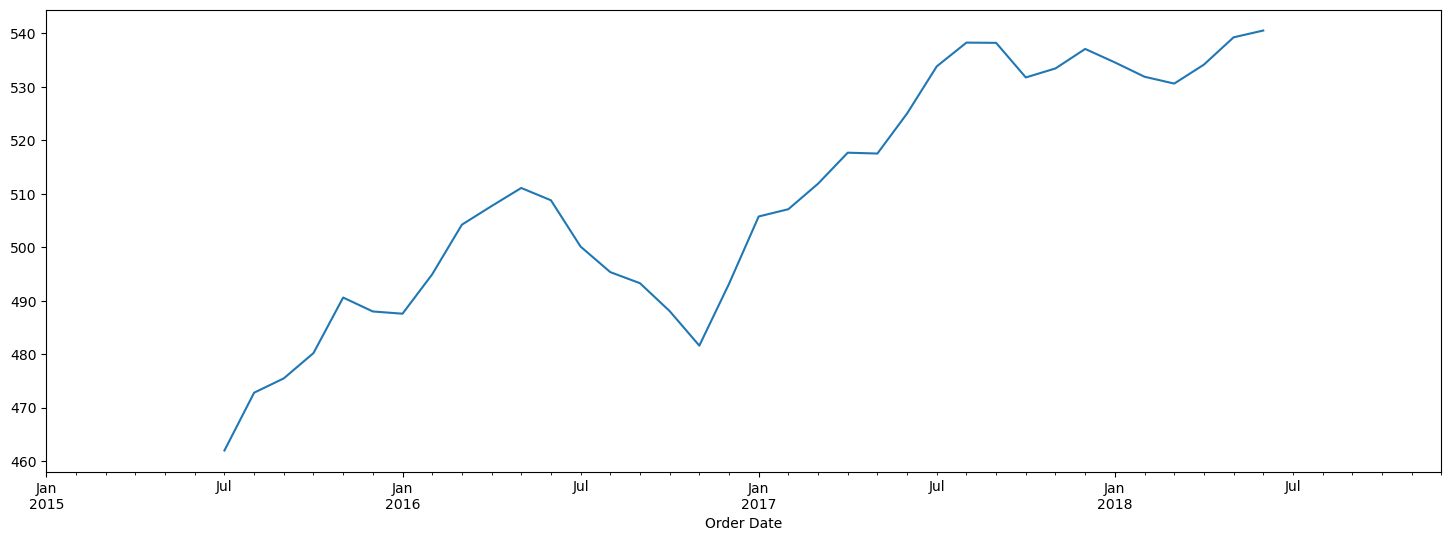

In [55]:
#represents long term movement of data
decomposition_furniture.trend.plot(figsize=(18,6))

<AxesSubplot:xlabel='Order Date'>

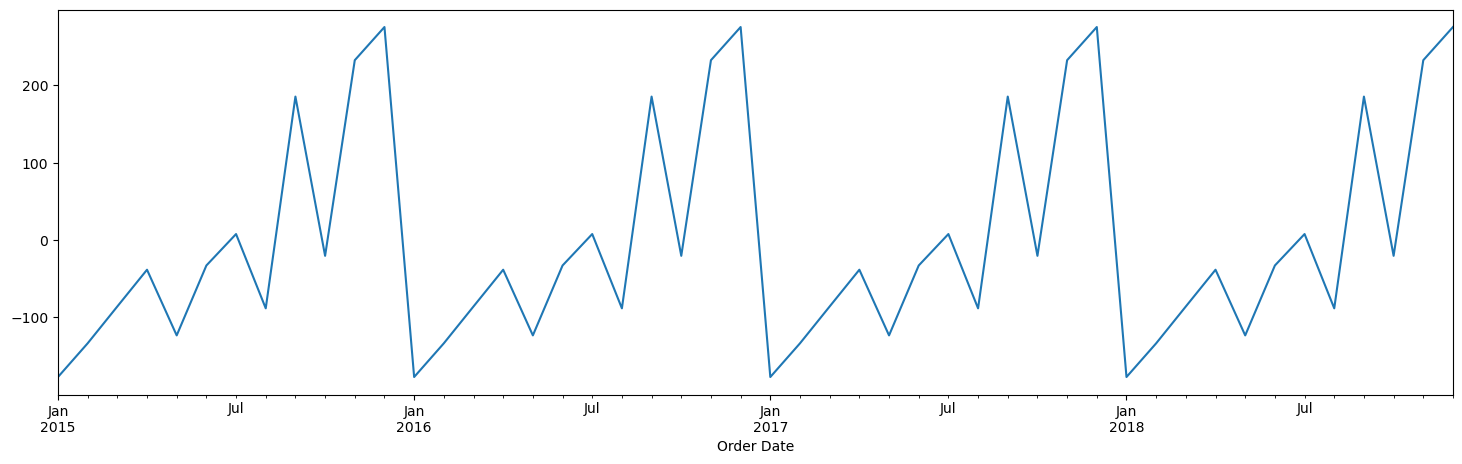

In [56]:
# represents repetitive patterns or cycles into the data
decomposition_furniture.seasonal.plot(figsize=(18,5))

The above plot shows that sales of furniture is not stable, along with obvious seasonality

# Time series forecasting with ARIMA

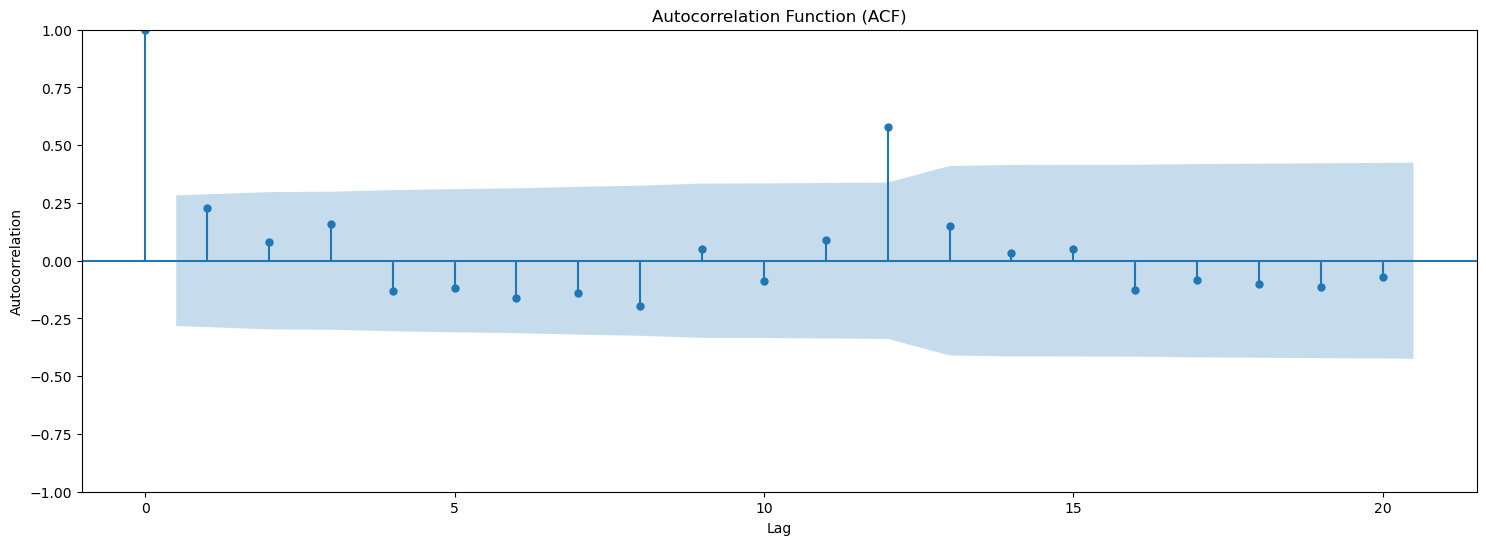

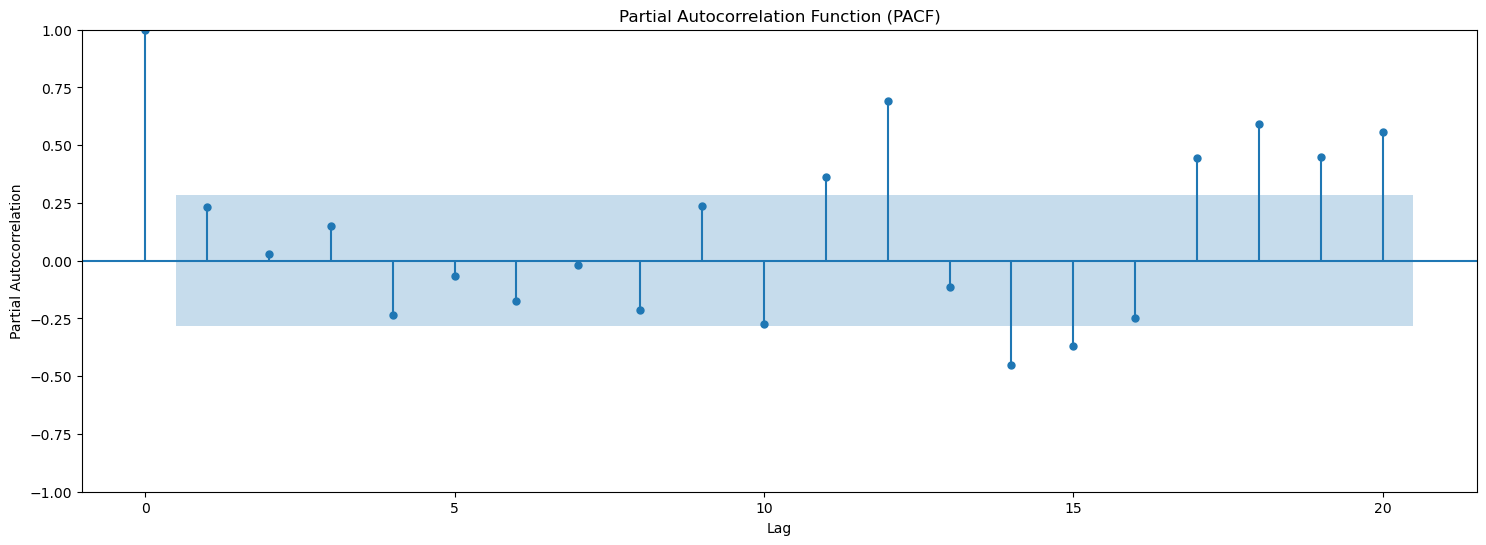

In [57]:

# Plot ACF
plot_acf(y_furniture, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(y_furniture, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

By using above acf and pacf graph we conclude the values of p, d, q => 1, 1, 1

## Fitting ARIMA Model

In [58]:
mod = sm.tsa.statespace.SARIMAX(y_furniture,
                                order=(1, 1, 1),  # (p, d, q)
                                seasonal_order=(1, 1, 1, 12),  # (p, q, q, s) s->seasonal period (i.e. month)
                                enforce_invertibility=False)

model = mod.fit()

# Validating Forecasts

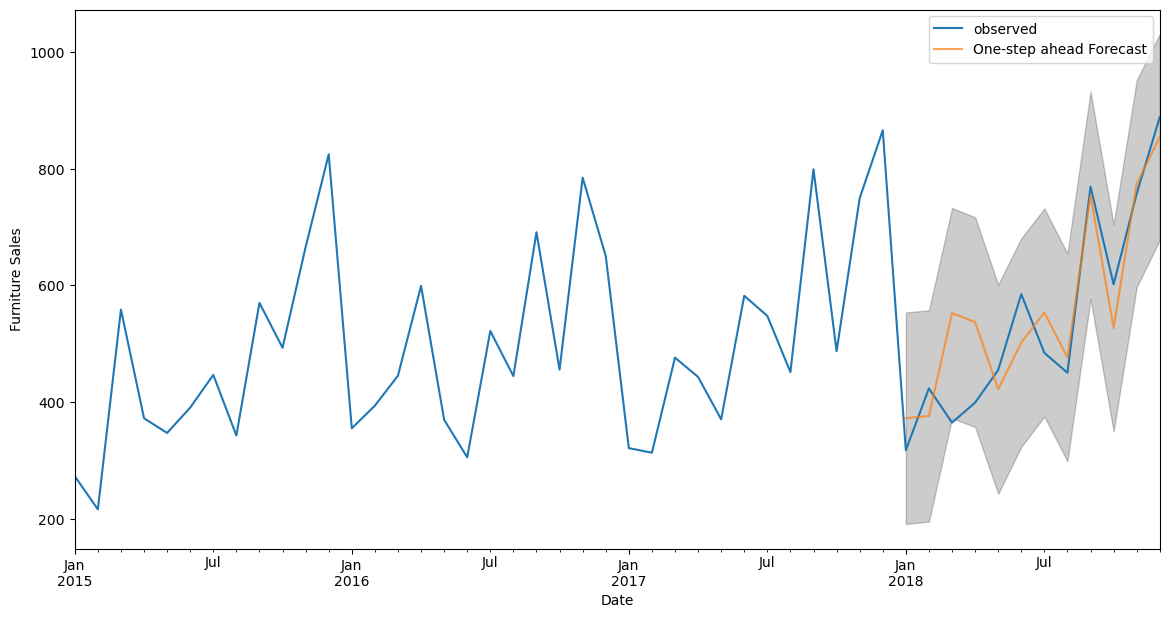

In [59]:
#get_prediction method from the results of your SARIMA model to generate one-step-ahead forecasts and visualize them


pred = model.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_furniture['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()


# Office Supplies

In [60]:
office=df.loc[df['Category']=='Office Supplies']
f1=office.copy()


In [62]:
cols=['Order ID', 'Ship Date','Country', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
        'Quantity', 'Discount', 'Profit']

f1=f1.drop(f1[cols],axis=1)


In [63]:
f1=f1.sort_values('Order Date')

In [64]:
f1

,Order Date,Sales
7980,2015-01-03,16.448
740,2015-01-04,272.736
739,2015-01-04,11.784
741,2015-01-04,3.540
1759,2015-01-05,19.536
...,...,...
5091,2018-12-30,3.024
1297,2018-12-30,20.720
908,2018-12-30,52.776
1296,2018-12-30,13.904


# Indexing the Dataset

In [66]:
#To find the total sales of furniture occured on each dates
f1=f1.groupby('Order Date')['Sales'].sum().reset_index()
#set order date as the index column
f1.set_index('Order Date',inplace=True)
f1.size

1147

In [67]:
f1.head()

,Sales
Order Date,
2015-01-03,16.4480
2015-01-04,288.0600
2015-01-05,19.5360
2015-01-06,574.3015
2015-01-07,10.4300


# Stationarity check

In [70]:
#Augmented Dickey-Fuller (ADF) test 
#HO: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    # if p-value <= 0.05
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root,indicating it is non stationary")
        
        
adfuller_test(f1['Sales'])

strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


In [71]:
# resample the time series data. 'MS' specifies that we want to resample the data to the start of each month ('M')
# and calculate the mean value ('S' stands for 'start').
# This effectively aggregates the data into monthly intervals.

y_office=f1['Sales'].resample('MS').mean()
y_office

Order Date
2015-01-01    225.852618
2015-02-01     63.042588
2015-03-01    315.297159
2015-04-01    276.295896
2015-05-01    223.574341
2015-06-01    363.179114
2015-07-01    285.869425
2015-08-01    403.958548
2015-09-01    497.904444
2015-10-01    266.842574
2015-11-01    658.483089
2015-12-01    522.333500
2016-01-01    129.198571
2016-02-01    194.419969
2016-03-01    321.816152
2016-04-01    305.503660
2016-05-01    308.732620
2016-06-01    355.637816
2016-07-01    200.749152
2016-08-01    450.449357
2016-09-01    613.268640
2016-10-01    250.385937
2016-11-01    595.903179
2016-12-01    467.880133
2017-01-01    216.392812
2017-02-01    330.176194
2017-03-01    339.802320
2017-04-01    372.215152
2017-05-01    353.195310
2017-06-01    405.796580
2017-07-01    469.271295
2017-08-01    270.263615
2017-09-01    596.097143
2017-10-01    376.641958
2017-11-01    617.166654
2017-12-01    731.824875
2018-01-01    399.204432
2018-02-01    286.238237
2018-03-01    468.422870
2018-04-01    

<AxesSubplot:xlabel='Order Date'>

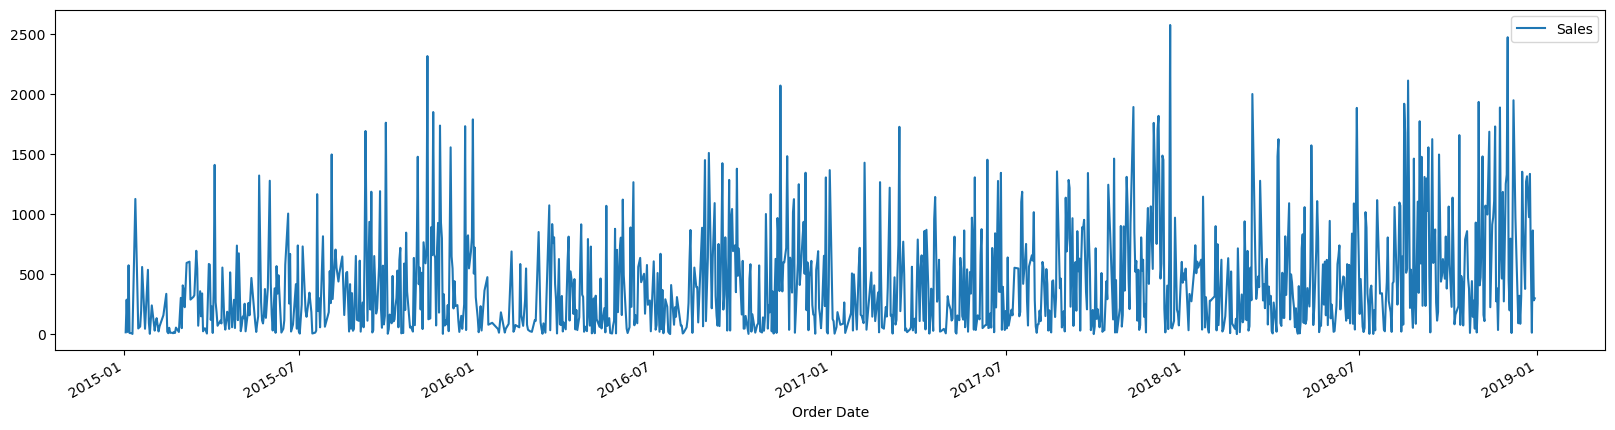

In [72]:
## Plotting sales data of office category
f1.plot(figsize=(20,5))

Text(0, 0.5, 'Sales')

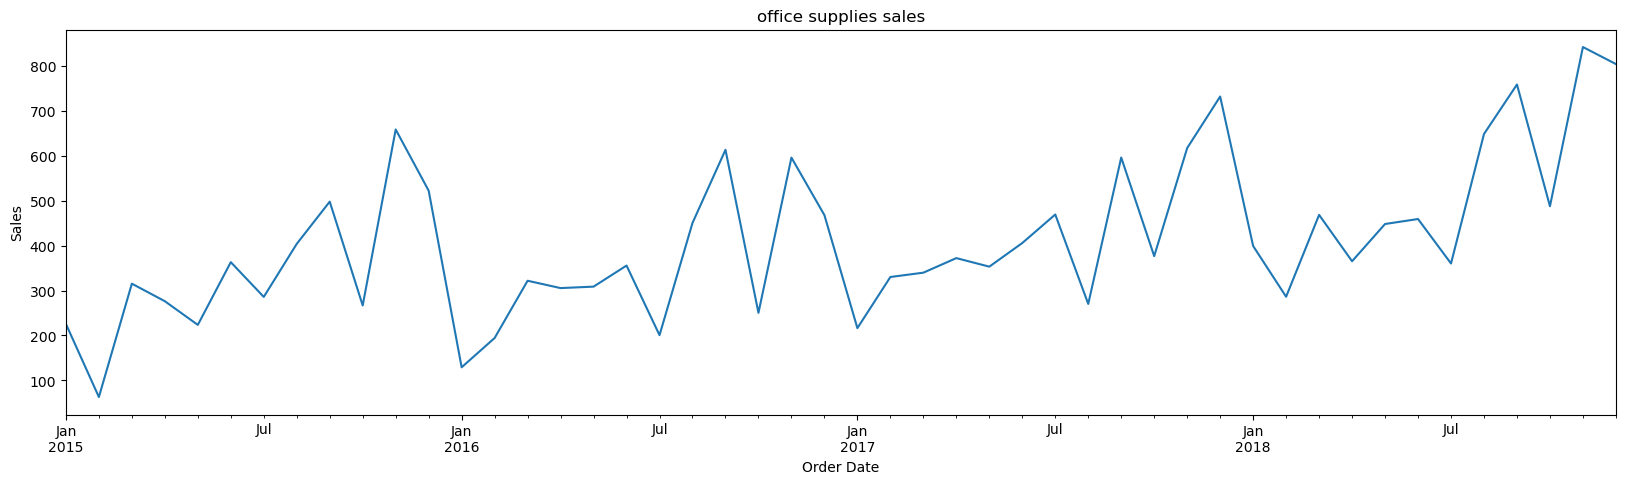

In [73]:
## Plotting mean sale data of office category
y_office.plot(figsize=(20,5))
plt.title("office supplies sales")
plt.ylabel("Sales")

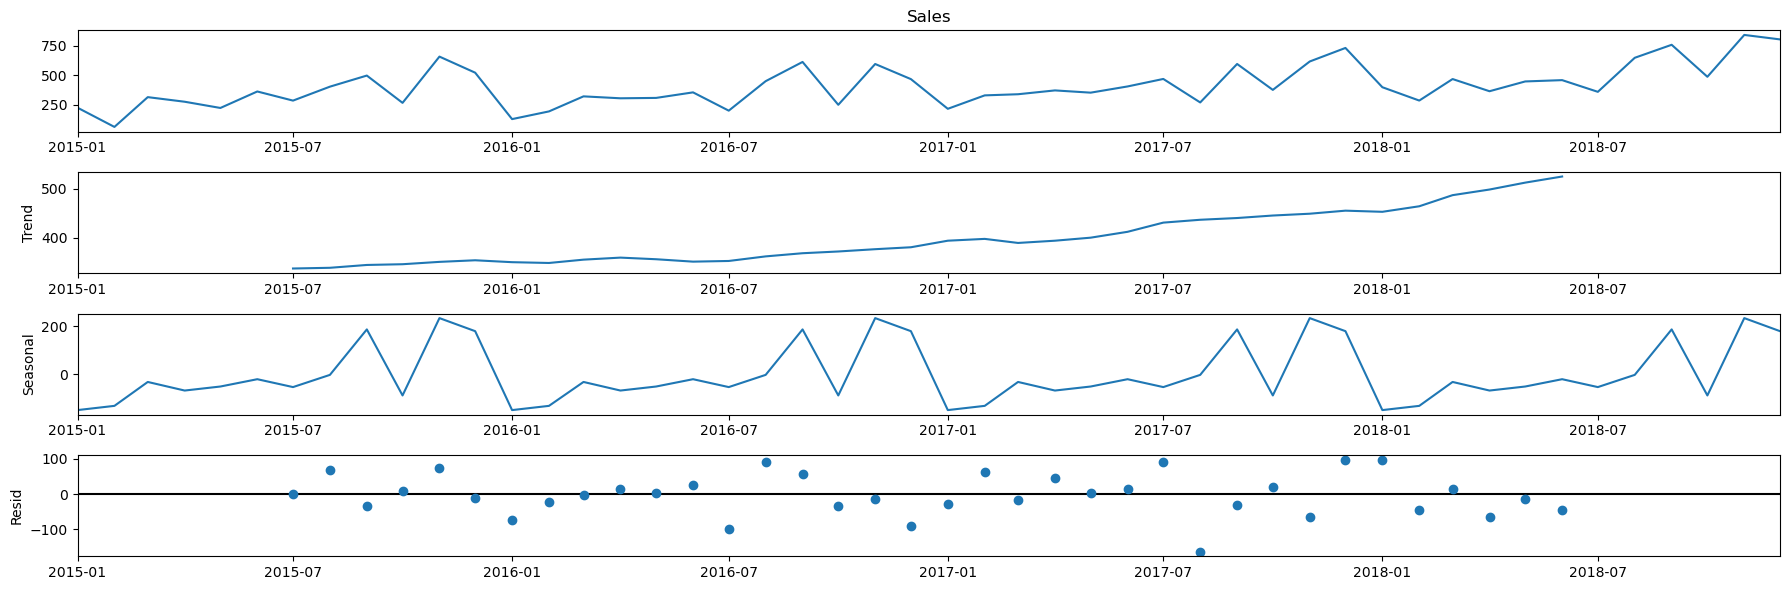

In [74]:
#ets decomposition
from pylab import rcParams
rcParams['figure.figsize']=18,6
decomposition_office = sm.tsa.seasonal_decompose(y_office,model='additive')
fig = decomposition_office.plot()
plt.show()

# Time series forecasting with ARIMA

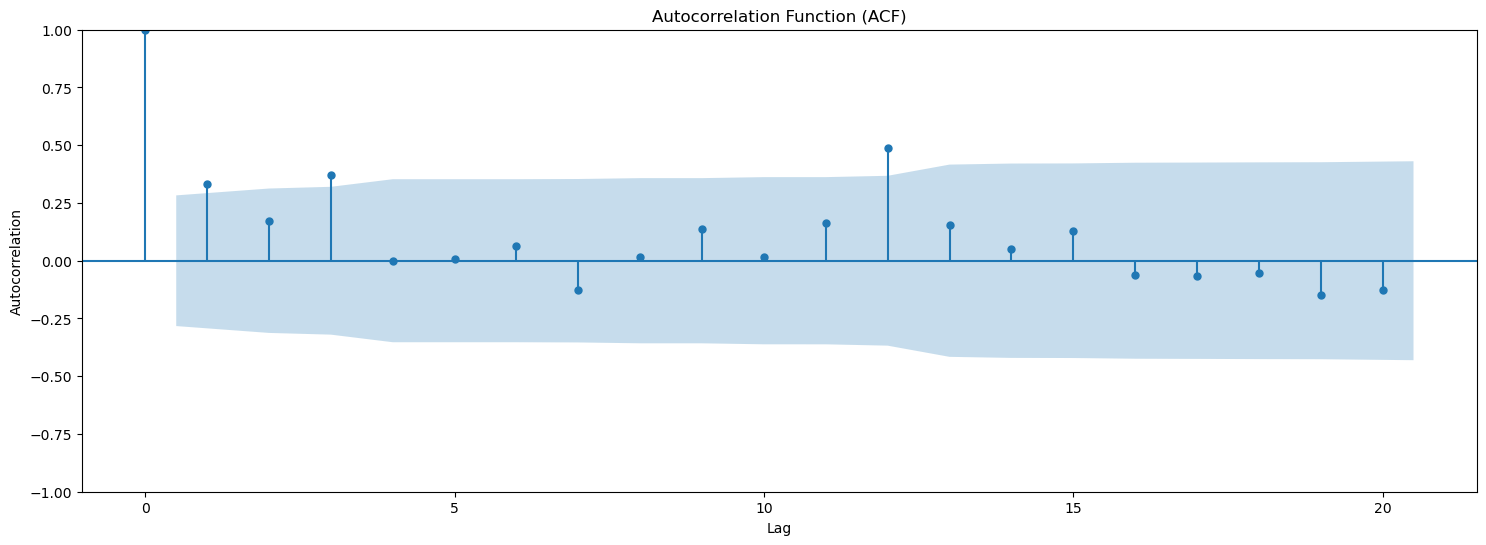

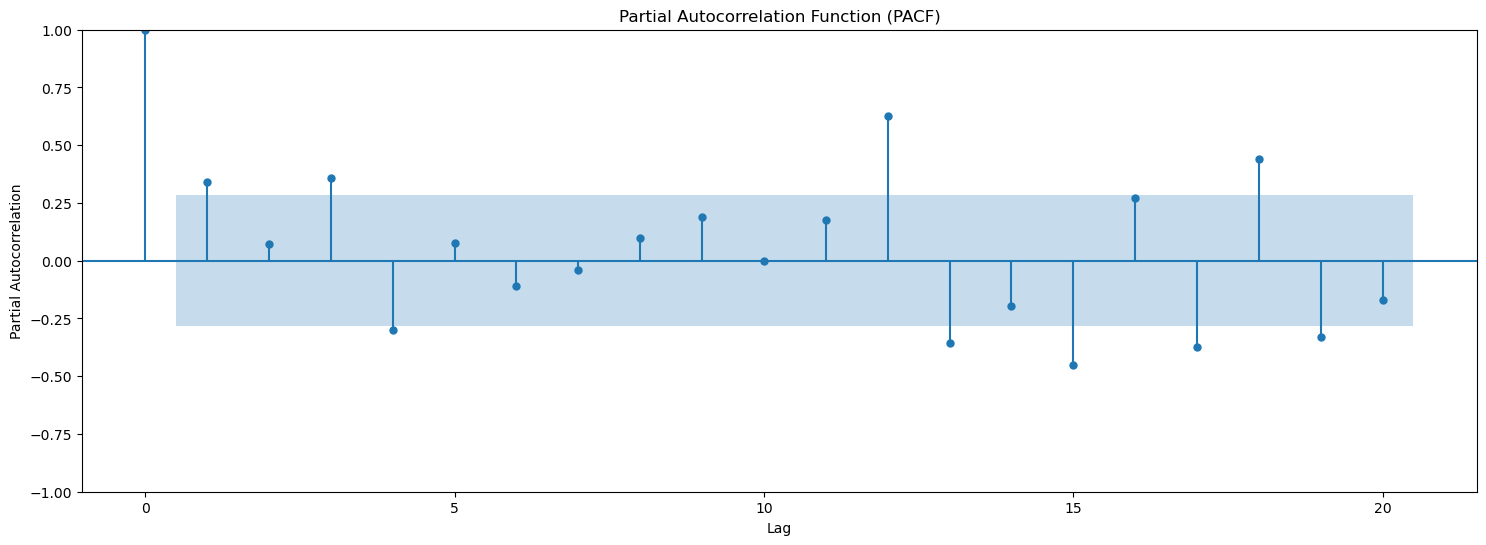

In [75]:

# Plot ACF
plot_acf(y_office, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(y_office, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [77]:
## Fitting ARIMA Model
mod = sm.tsa.statespace.SARIMAX(y_office,
                                order=(1, 1, 1),  # (p, d, q)
                                seasonal_order=(1, 1, 1, 12),  # (p, q, q, s) s->seasonal period (i.e. month)
                                enforce_invertibility=False)

model = mod.fit()

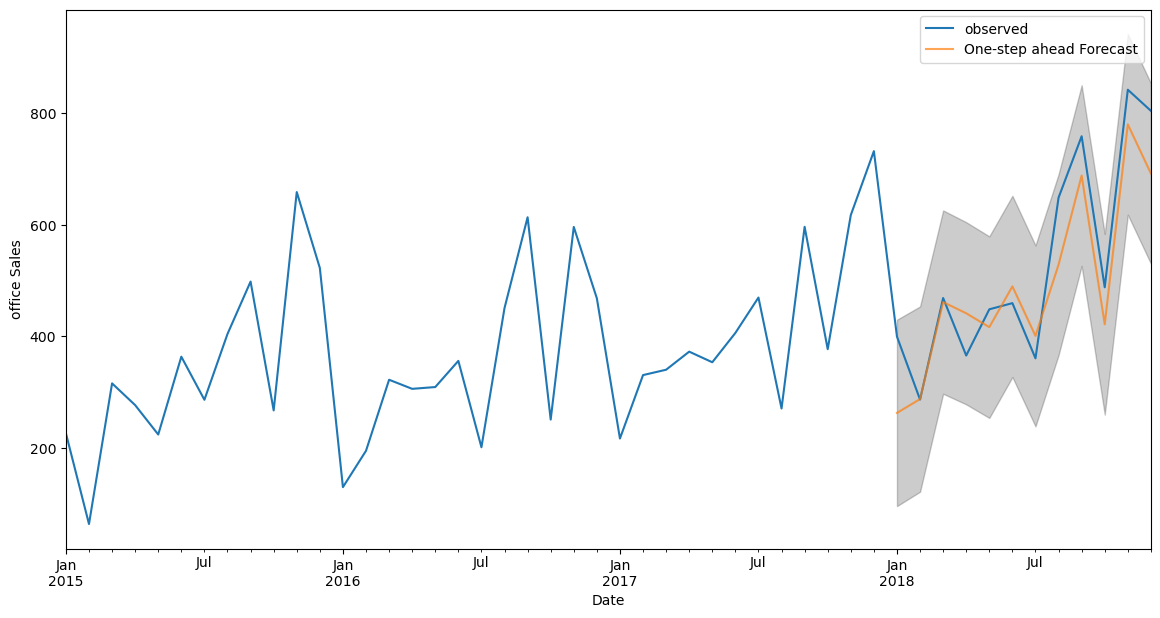

In [78]:
#get_prediction method from the results of your SARIMA model to generate one-step-ahead forecasts and visualize them


pred = model.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_office['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('office Sales')
plt.legend()

plt.show()


# TECHNOLOGY

In [79]:
#Now we create a dataframe showing the details of the sales of one product,,here we are going to show the data of furniture sales.
technology=df.loc[df['Category']=='Technology']
technology

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,498.9415,6,0.2,70.812375
11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,498.9415,4,0.2,68.356800
19,CA-2015-143336,2015-08-27,2015-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.4800,3,0.2,16.011000
26,CA-2017-121755,2017-01-16,2017-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,90049.0,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.5700,3,0.0,11.774100
35,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,498.9415,7,0.2,70.812375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,US-2017-157728,2017-09-22,2017-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,Michigan,49505.0,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.9800,2,0.0,27.434400
9986,CA-2017-125794,2017-09-29,2017-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,California,90008.0,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.2400,1,0.0,15.220800
9987,CA-2018-163629,2018-11-17,2018-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605.0,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.9900,1,0.0,28.796400
9988,CA-2018-163629,2018-11-17,2018-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,30605.0,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.1000,5,0.0,55.647000


In [82]:
f1=technology.copy()
cols=['Order ID', 'Ship Date','Country', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
        'Quantity', 'Discount', 'Profit']
f1=f1.drop(f1[cols],axis=1)
f1

,Order Date,Sales
7,2015-06-09,498.9415
11,2015-06-09,498.9415
19,2015-08-27,213.4800
26,2017-01-16,90.5700
35,2017-12-08,498.9415
...,...,...
9983,2017-09-22,97.9800
9986,2017-09-29,36.2400
9987,2018-11-17,79.9900
9988,2018-11-17,206.1000


In [83]:
f1=f1.sort_values('Order Date')
f1

,Order Date,Sales
7478,2015-01-06,498.9415
7477,2015-01-06,391.9800
593,2015-01-09,31.2000
765,2015-01-13,498.9415
1913,2015-01-15,149.9500
...,...,...
4924,2018-12-25,90.4800
2569,2018-12-27,164.3880
573,2018-12-28,14.8500
1878,2018-12-29,302.3760


In [84]:
#To find the total sales of furniture occured on each dates
f1=f1.groupby('Order Date')['Sales'].sum().reset_index()
f1.set_index('Order Date',inplace=True)
f1.size

824

In [86]:
f1.head()

,Sales
Order Date,
2015-01-06,890.9215
2015-01-09,31.2000
2015-01-13,498.9415
2015-01-15,149.9500
2015-01-16,124.2000


In [87]:
def adfuller_test(sales):
    result=adfuller(sales)
    # if p-value <= 0.05
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root,indicating it is non stationary")
        
adfuller_test(f1['Sales'])

strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


In [88]:
# resample the time series data. 'MS' specifies that we want to resample the data to the start of each month ('M')
# and calculate the mean value ('S' stands for 'start').
# This effectively aggregates the data into monthly intervals.

y_technology=f1['Sales'].resample('MS').mean()
y_technology

Order Date
2015-01-01    362.497786
2015-02-01    229.787143
2015-03-01    374.778406
2015-04-01    433.124100
2015-05-01    351.134147
2015-06-01    506.668909
2015-07-01    449.682067
2015-08-01    535.995769
2015-09-01    702.349433
2015-10-01    329.128650
2015-11-01    651.704760
2015-12-01    647.761333
2016-01-01    503.052200
2016-02-01    385.113062
2016-03-01    317.934417
2016-04-01    513.571031
2016-05-01    430.229964
2016-06-01    338.024700
2016-07-01    464.273167
2016-08-01    568.082393
2016-09-01    646.354650
2016-10-01    484.011139
2016-11-01    626.918109
2016-12-01    776.567659
2017-01-01    281.200867
2017-02-01    325.385250
2017-03-01    454.733921
2017-04-01    280.806588
2017-05-01    580.380417
2017-06-01    492.573219
2017-07-01    506.321531
2017-08-01    375.894675
2017-09-01    641.317375
2017-10-01    441.197156
2017-11-01    632.072220
2017-12-01    623.197500
2018-01-01    521.585393
2018-02-01    322.468036
2018-03-01    562.188417
2018-04-01    

<AxesSubplot:xlabel='Order Date'>

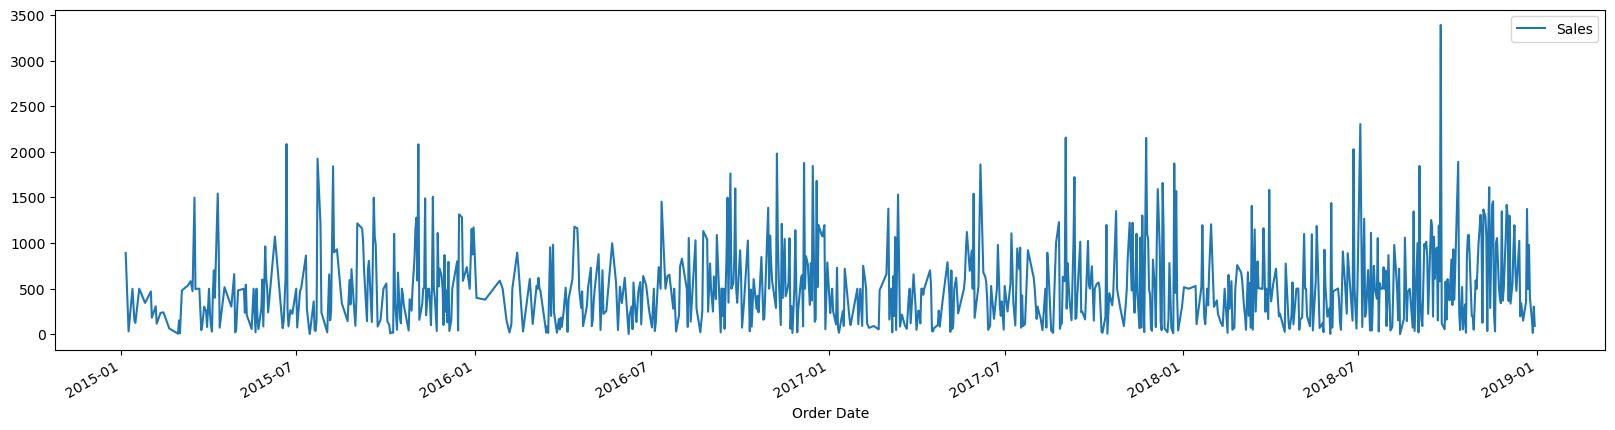

In [89]:
f1.plot(figsize=(20,5))

Text(0, 0.5, 'Sales')

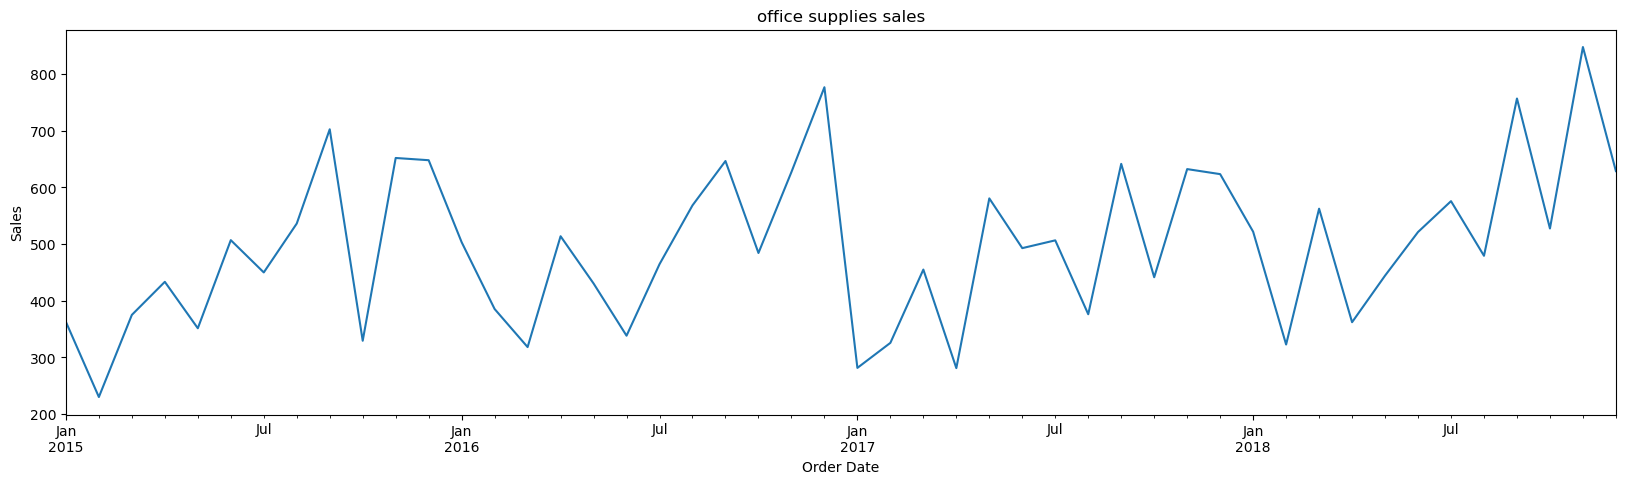

In [90]:
y_technology.plot(figsize=(20,5))
plt.title("office supplies sales")
plt.ylabel("Sales")

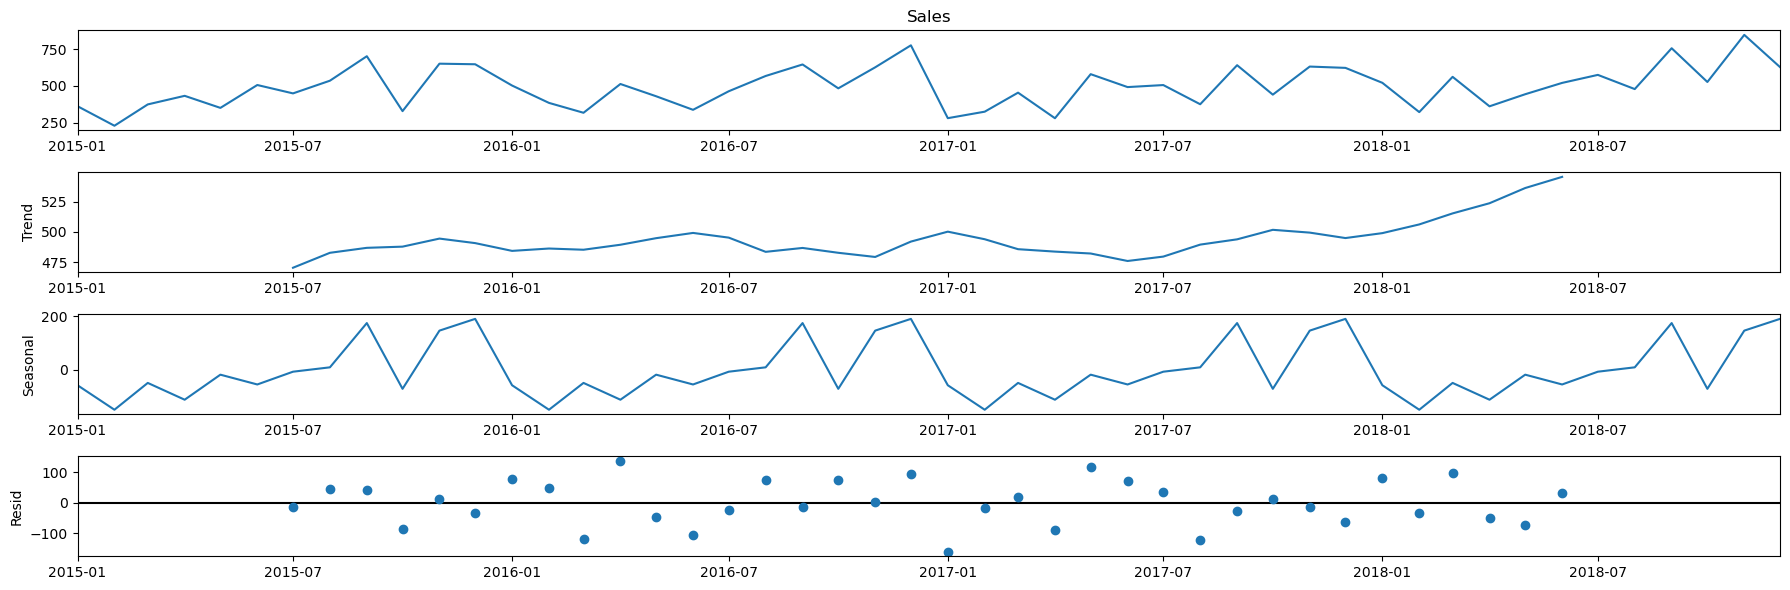

In [91]:
from pylab import rcParams
rcParams['figure.figsize']=18,6
decomposition_technology = sm.tsa.seasonal_decompose(y_technology,model='additive')
fig = decomposition_technology.plot()
plt.show()

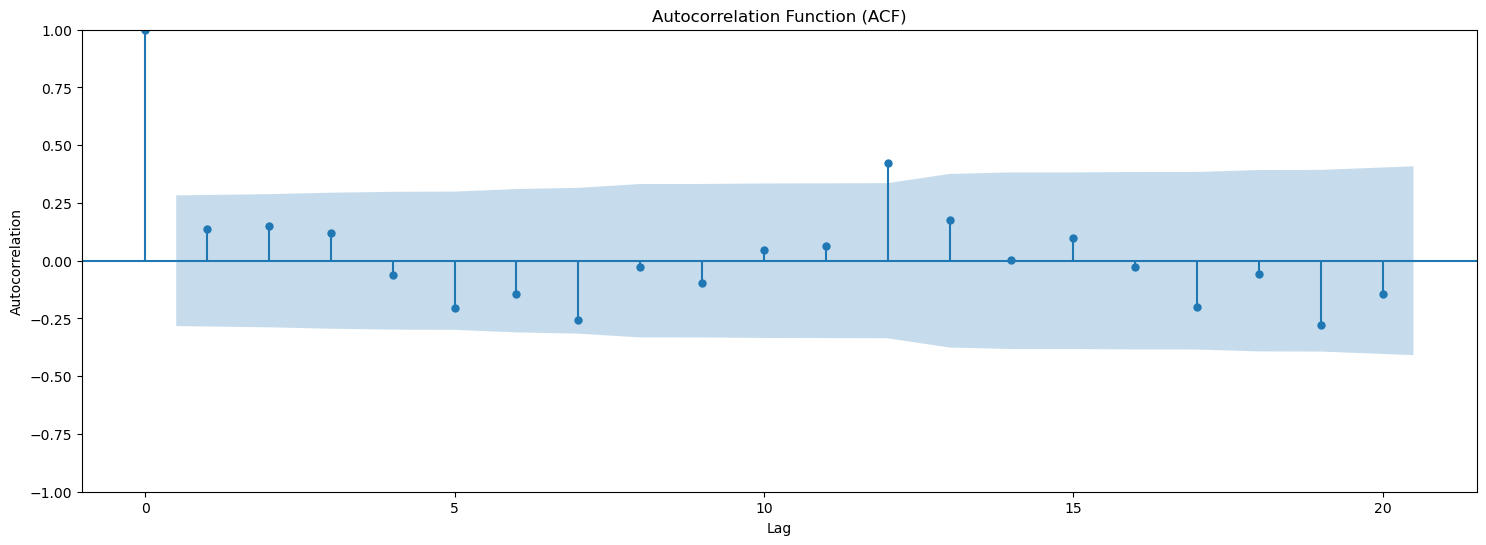

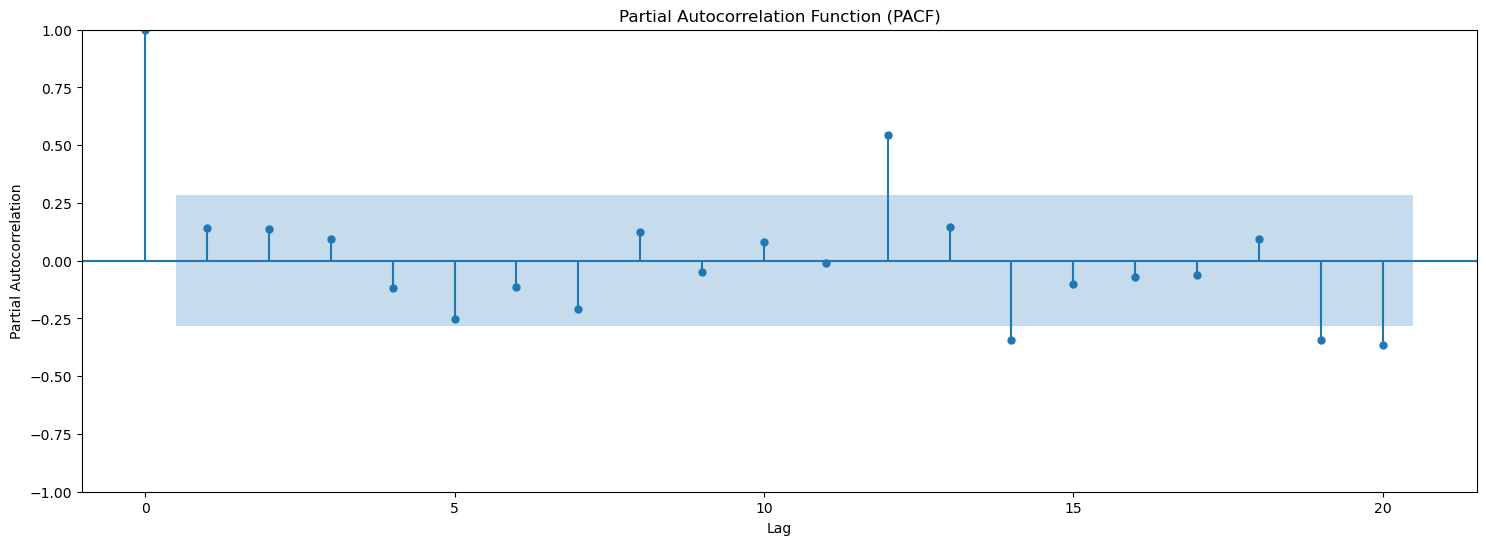

In [92]:
# Plot ACF
plot_acf(y_technology, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(y_technology, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [93]:
mod = sm.tsa.statespace.SARIMAX(y_technology,
                                order=(1, 1, 1),  # (p, d, q)
                                seasonal_order=(1, 1, 1, 12),  # (p, q, q, s) s->seasonal period (i.e. month)
                                enforce_invertibility=False)

model = mod.fit()

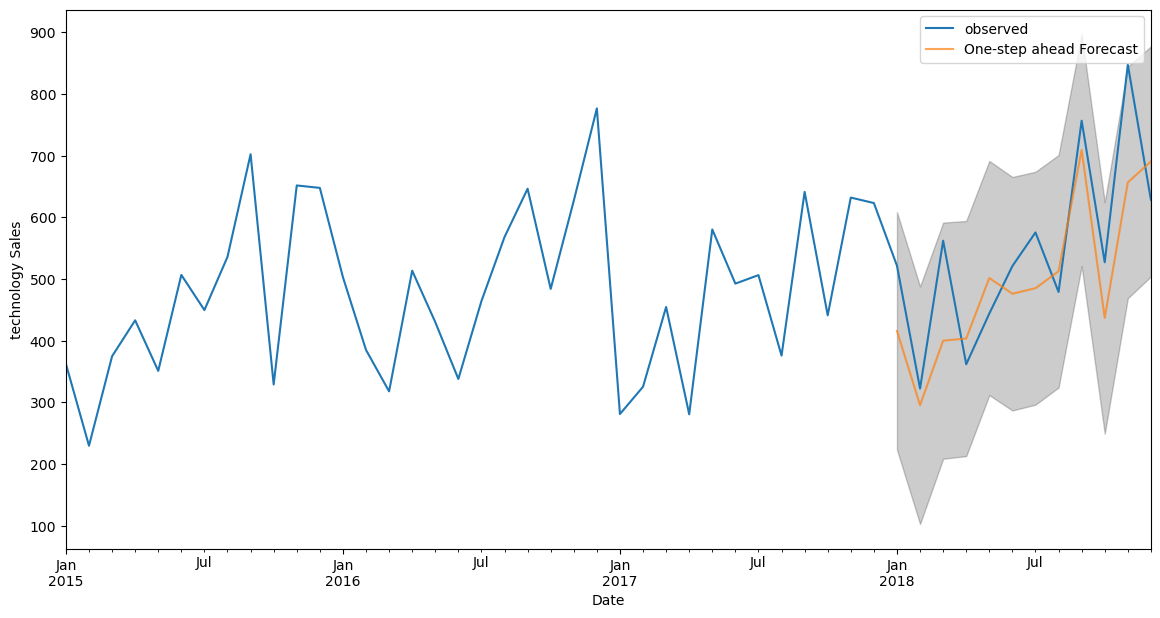

In [94]:
pred = model.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_technology['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('technology Sales')
plt.legend()

plt.show()